<a href="https://colab.research.google.com/github/AnaLets/breast_cancer/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import libraries



In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

import matplotlib.pyplot as plt


cancer = load_breast_cancer() 
data = np.c_[cancer.data, cancer.target] 
columns = np.append(cancer.feature_names, ["target"]) 
df = pd.DataFrame(data, columns=columns) 
df = df.dropna() 
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


##X - input variable

In [ ]:
X = df.iloc[:, 0:-1] 
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## y - target variable

In [ ]:
y = df.iloc[:, -1]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

##Train/test division

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


##Feature Scaling

In [ ]:
sc = StandardScaler()
X_train_std  = sc.fit_transform(X_train)
X_test_std  = sc.transform(X_test)
X_train_std

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

##Knn classification

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

print(knn_model.fit(X_train_std, y_train))



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


## Fit model to train data

In [ ]:
y_pred = knn_model.predict(X_test_std)
print(y_pred)
print(y_test)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
204    1.0
70     0.0
131    0.0
431    1.0
540    1.0
      ... 
486    1.0
75     0.0
249    1.0
238    1.0
265    0.0
Name: target, Length: 114, dtype: float64


##Accuracy

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9473684210526315


## Nearest Centroid

In [ ]:
cn_model = NearestCentroid(metric='euclidean')
cn_model.fit(X_train, y_train)

print(cn_model.centroids_)

[[1.74169231e+01 2.14923077e+01 1.15012959e+02 9.75013609e+02
  1.02531124e-01 1.43885148e-01 1.59455266e-01 8.67635503e-02
  1.93533136e-01 6.26227219e-02 6.00757988e-01 1.20041598e+00
  4.28259763e+00 7.18094675e+01 6.75819527e-03 3.17857870e-02
  4.18483432e-02 1.50038935e-02 2.06236627e-02 3.97157988e-03
  2.10274556e+01 2.92200592e+01 1.40713964e+02 1.41022781e+03
  1.44440769e-01 3.71363373e-01 4.51448994e-01 1.81149467e-01
  3.26636095e-01 9.11269822e-02]
 [1.21680559e+01 1.78216434e+01 7.82140909e+01 4.64910839e+02
  9.17334615e-02 7.98258741e-02 4.72053007e-02 2.55395140e-02
  1.73751049e-01 6.28359790e-02 2.84577273e-01 1.20402867e+00
  2.01659545e+00 2.13169266e+01 7.12550350e-03 2.20011573e-02
  2.74909122e-02 1.00562413e-02 2.05438776e-02 3.73115490e-03
  1.34032587e+01 2.33585664e+01 8.72421678e+01 5.61890210e+02
  1.23904301e-01 1.82647238e-01 1.70089682e-01 7.46106678e-02
  2.69150350e-01 7.95783566e-02]]


##Train

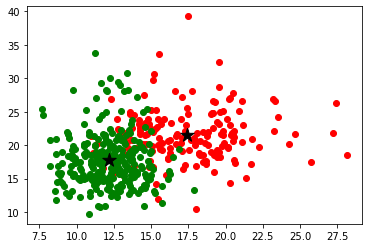

In [ ]:
X_train= np.array(X_train)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

##Predict and test

[1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
204    1.0
70     0.0
131    0.0
431    1.0
540    1.0
      ... 
486    1.0
75     0.0
249    1.0
238    1.0
265    0.0
Name: target, Length: 114, dtype: float64
0.9385964912280702


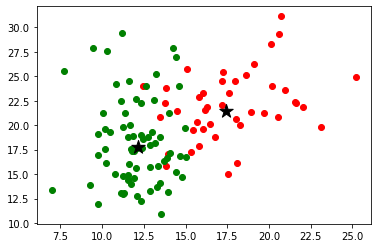

In [ ]:
y_pred = cn_model.predict(X_test)
print(y_pred)
print(y_test)

print(accuracy_score(y_test, y_pred))

X_test = np.array(X_test)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='r')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

plt.show()

##Nearest Centroid - class

In [ ]:
class NearestCentroidScratch():
    def __init__(self, metric='eucledian'):
        self.metric = metric
        self.centroids_ = np.array([])

    def fit(self, X, y):
        c1 = np.mean(X[y == 1], axis=0)
        c2 = np.mean(X[y == 0], axis=0)
        self.centroids_ = np.concatenate((self.centroids_, c1))
        self.centroids_ = np.concatenate((self.centroids_, c2))
        self.cn_model = NearestCentroid(metric='euclidean')
        self.cn_model.fit(X, y)

    def graph_train(self, X, y):
        X = np.array(X)
        plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r')
        plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g')

        plt.scatter(cn_model.centroids_[:, 0], cn_model.centroids_[:, 1], s=200, marker='*', c='k')
        plt.show()

    def predict(self, X):
        y = self.cn_model.predict(X)
        return y


    def score(self, y1, y2):
        a =  accuracy_score(y1, y2)
        print("Acurácia obtida: ", a)

    def graph_test(self, X, y):
        X = np.array(X)
        plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r')
        plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g')

        plt.scatter(cn_model.centroids_[:, 0], cn_model.centroids_[:, 1], s=200, marker='*', c='k')

        plt.show()




##Fit - centroids

In [ ]:
clf = NearestCentroidScratch()
clf.fit(X, y)

clf.centroids_

array([1.21465238e+01, 1.79147619e+01, 7.80754062e+01, 4.62790196e+02,
       9.24776471e-02, 8.00846218e-02, 4.60576210e-02, 2.57174062e-02,
       1.74185994e-01, 6.28673950e-02, 2.84082353e-01, 1.22038011e+00,
       2.00032129e+00, 2.11351485e+01, 7.19590196e-03, 2.14382465e-02,
       2.59967356e-02, 9.85765266e-03, 2.05838067e-02, 3.63605126e-03,
       1.33798011e+01, 2.35150700e+01, 8.70059384e+01, 5.58899440e+02,
       1.24959496e-01, 1.82672549e-01, 1.66237723e-01, 7.44443445e-02,
       2.70245938e-01, 7.94420728e-02, 1.74628302e+01, 2.16049057e+01,
       1.15365377e+02, 9.78376415e+02, 1.02898491e-01, 1.45187783e-01,
       1.60774717e-01, 8.79900000e-02, 1.92908962e-01, 6.26800943e-02,
       6.09082547e-01, 1.21091462e+00, 4.32392925e+00, 7.26724057e+01,
       6.78009434e-03, 3.22811651e-02, 4.18240094e-02, 1.50604717e-02,
       2.04724009e-02, 4.06240566e-03, 2.11348113e+01, 2.93182075e+01,
       1.41370330e+02, 1.42228632e+03, 1.44845236e-01, 3.74824104e-01,
      

Graph - train

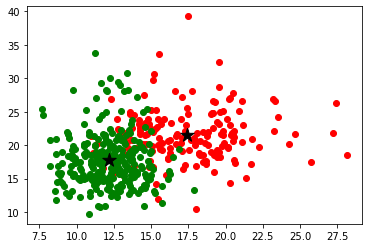

In [ ]:
clf.graph_train(X_train, y_train)

##Predict

In [ ]:
clf.predict(X_test)

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

Accuracy score

In [ ]:
clf.score(y_test, y_pred)

Acurácia obtida:  0.9385964912280702


In [ ]:
Graph - test

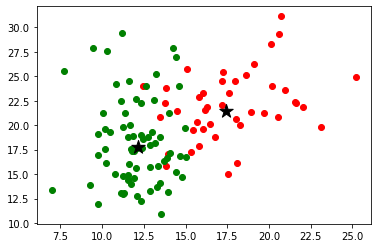

In [ ]:
clf.graph_test(X_test, y_test)